In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hs = pd.read_csv(r"C:\Users\hp\Downloads\archive (6)\housing.csv")
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
hs["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
hs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


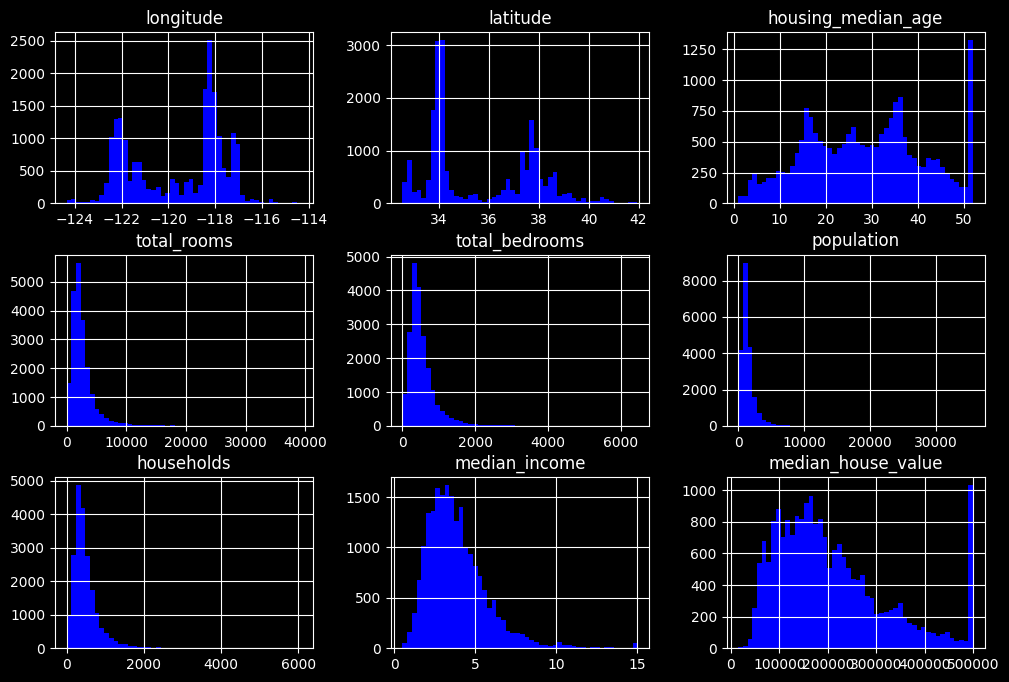

In [7]:
plt.style.use("dark_background")
hs.hist(bins = 50, figsize=(12, 8), color = 'blue')
plt.show()

In [8]:
def shuffleSplit(data, test_ratio):
    shuff_indx = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indx = shuff_indx[:test_set_size]
    train_indx = shuff_indx[test_set_size:]
    return data.iloc[train_indx], data.iloc[test_indx]

In [9]:
train_set, test_set = shuffleSplit(hs, 0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
from zlib import crc32

In [13]:
def id_in_test_set(idf, test_ratio):
    return crc32(np.int64(idf)) < test_ratio * 2 ** 32

In [14]:
def splitHash(data, test_ratio, id_col):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [15]:
hs_id = hs.reset_index()
train_set, test_set = splitHash(hs_id, 0.2, "index")

In [16]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
hs_id["id"] = hs["longitude"] * 1000 + hs["latitude"]
train_set, test_set = splitHash(hs_id, 0.2, "id")

In [18]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_set, test_set = train_test_split(hs, test_size = 0.2, random_state = 42)

In [21]:
hs["income_cat"] = pd.cut(hs["median_income"],
                          bins = [0.,1.5,3.0,4.5,6.,np.inf], labels = [1,2,3,4,5])

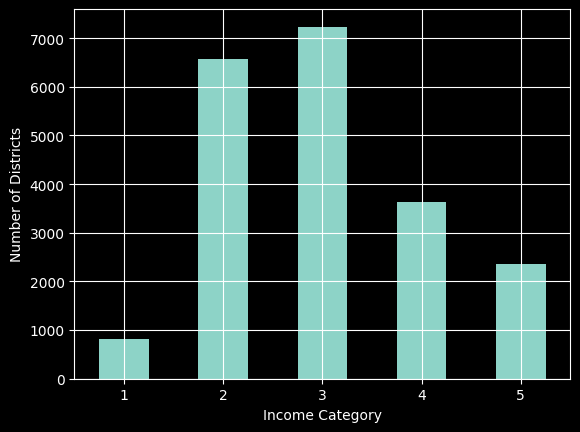

In [22]:
hs["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2, random_state = 42)
strat_splits = []

for train_idx, test_idx in splitter.split(hs, hs["income_cat"]):
    strat_train_set_n = hs.iloc[train_idx]
    strat_test_set_n = hs.iloc[test_idx]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Or using train_test_split --> 

strat_train_set, strat_test_set = train_test_split(hs,test_size=0.2, stratify=hs["income_cat"],random_state=42)

In [26]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13184\3367522436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat",axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13184\3367522436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat",axis=1, inplace=True)


In [28]:
hs = strat_train_set.copy()

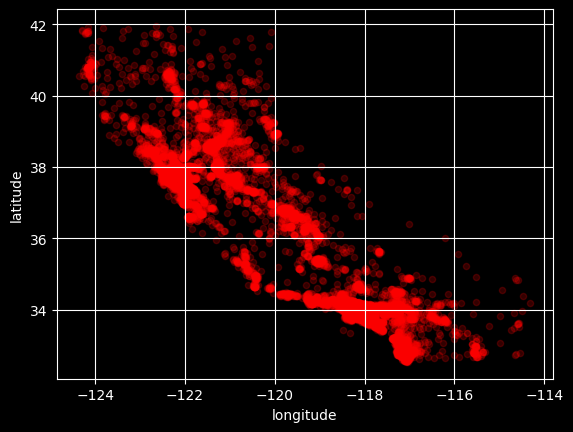

In [29]:
hs.plot(kind="scatter", x = "longitude", y = "latitude",grid=True,color='red', alpha=0.2)
plt.show()

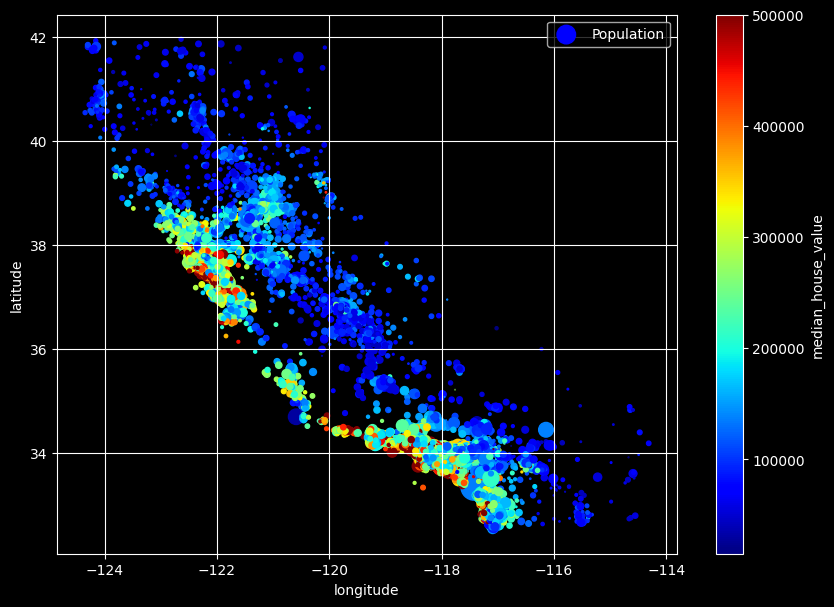

In [30]:
hs.plot(kind="scatter", x="longitude", y = "latitude", grid=True, 
        s = hs["population"] / 100, label="Population", c = "median_house_value",
        cmap="jet",colorbar = True, legend=True, sharex=False,figsize=(10,7))
plt.show()

In [31]:
corr_matrix = hs.corr(numeric_only=True)

In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [33]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [34]:
from pandas.plotting import scatter_matrix

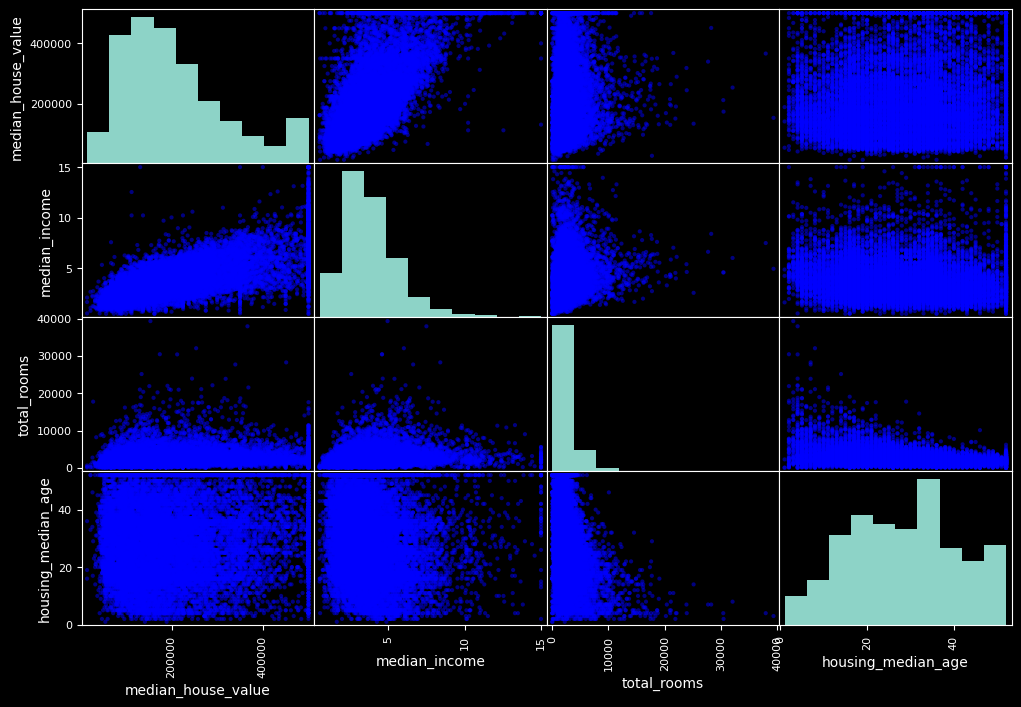

In [35]:
attr = ["median_house_value","median_income","total_rooms",
        "housing_median_age"]
scatter_matrix(hs[attr],figsize=(12, 8),color='blue')
plt.show()

Text(0, 0.5, 'Median House Value')

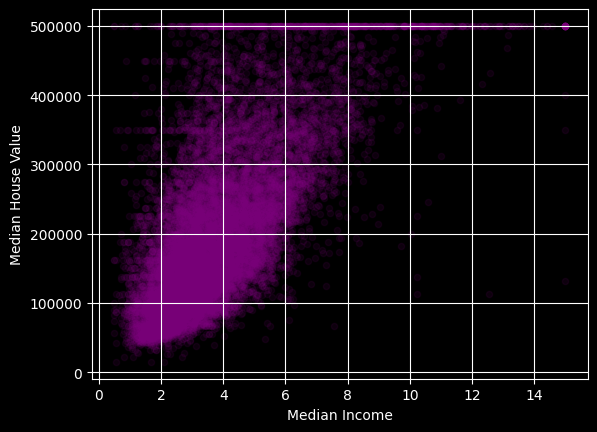

In [36]:
hs.plot(kind='scatter', x="median_income", y = "median_house_value", alpha=0.1,grid=True,color='purple')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")



In [37]:
hs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


<Axes: >

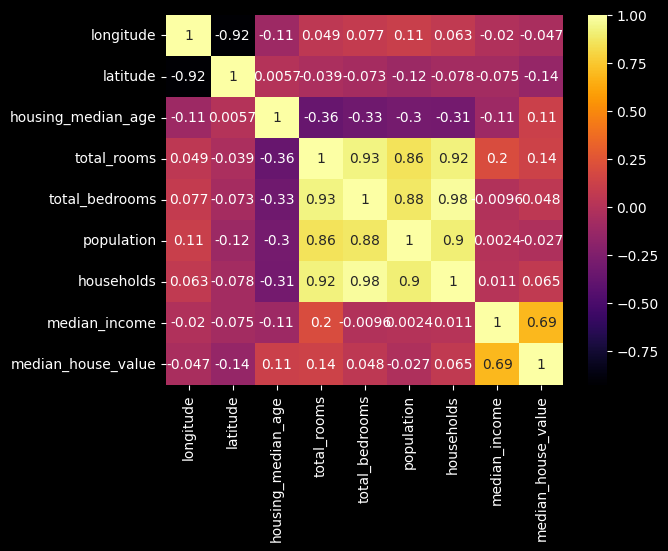

In [38]:
sns.heatmap(corr_matrix, annot=True,cmap='inferno')

In [39]:
hs['rooms_per_house'] = hs['total_rooms'] / hs['households']
hs['bedrooms_ratio'] = hs['total_bedrooms'] / hs['total_rooms']
hs['people_per_house'] = hs['population'] / hs['households']

In [40]:
corr_matrix = hs.corr(numeric_only=True)

In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [42]:
hs = strat_train_set.drop('median_house_value',axis=1)
hs_labels = strat_train_set['median_house_value'].copy()

In [43]:
median = hs['total_bedrooms'].median()
hs['total_bedrooms'].fillna(median)

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [45]:
hs_num = hs.select_dtypes(include=[np.number])


In [46]:
imputer.fit(hs_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [48]:
hs_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [49]:
x = imputer.transform(hs_num)

In [50]:
hs_tr = pd.DataFrame(x, columns=hs_num.columns, index=hs_num.index)

In [51]:
hs_cat = hs[["ocean_proximity"]]

In [52]:
hs_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


In [53]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
hs_cat_enc = ord_enc.fit_transform(hs_cat)

In [54]:
hs_cat_enc[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [55]:
ord_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
from sklearn.preprocessing import OneHotEncoder

cat_enc = OneHotEncoder()
hs_cat_1hot = cat_enc.fit_transform(hs_cat)

In [57]:
hs_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [58]:
cat_enc.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [59]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler(feature_range=(-1, 1))
hs_num_mmsc = min_max_sc.fit_transform(hs_num)

In [60]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
hs_num_stdsc = std_sc.fit_transform(hs_num)

In [61]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(hs[["housing_median_age"]],[[35]], gamma=0.1)

In [62]:
from sklearn.linear_model import LinearRegression

target_sclr = StandardScaler()

scaled_labels = target_sclr.fit_transform(hs_labels.to_frame())

model = LinearRegression()
model.fit(hs[["median_income"]], scaled_labels)
new_data = hs[["median_income"]].iloc[:5]

scld_predictions = model.predict(new_data)
predictions = target_sclr.inverse_transform(scld_predictions)


In [63]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(hs[["median_income"]],hs_labels)
predictions = model.predict(new_data)


# Custom Transformers


In [64]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(hs[["population"]])

RBF (Radial Basis Function) for Similarity Measure

In [65]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35]],gamma=0.1))

age_simil_35 = rbf_transformer.transform(hs[["housing_median_age"]])

here’s how to add a feature that will
measure the geographic similarity between each district and San Francisco:

In [66]:
sf_coords = 37.7749,-122.41
sf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords], gamma=0.1))

sf_simil = sf_transformer.transform(hs[["latitude", "longitude"]])

Custom transformers are also useful to combine features. For example, here’s
a FunctionTransformer that computes the ratio between the input features 0
and 1:

In [67]:
ratio_transformer = FunctionTransformer(lambda X:X[:,[0]] / X[:,[1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

You can get fit_transform() for free by simply adding TransformerMixin as a
base class: the default implementation will just call fit() and then transform().
If you add BaseEstimator as a base class (and avoid using *args and
**kwargs in your constructor), you will also get two extra methods:
get_params() and set_params(). These will be useful for automatic
hyperparameter tuning.
For example, here’s a custom transformer that acts much like the
StandardScaler:

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self,X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

The following code demonstrates custom
transformer that uses a KMeans clusterer in the fit() method to identify the
main clusters in the training data, and then uses rbf_kernel() in the
transform() method to measure how similar each sample is to each cluster
center:

In [69]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self,name=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,random_state=42)
similarities = cluster_simil.fit_transform(hs[["latitude","longitude"]],sample_weight=hs_labels)

In [70]:
similarities[:3].round(2)

array([[0.31, 0.  , 0.  , 0.9 , 0.  , 0.01, 0.  , 0.17, 0.  , 0.  ],
       [0.  , 0.12, 0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  ],
       [0.  , 0.1 , 0.  , 0.  , 0.43, 0.  , 0.11, 0.  , 0.02, 0.1 ]])

# Transformation Pipelines

Here is a small pipeline
for numerical attributes, which will first impute then scale the input features:

In [71]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),
                         ("standardize", StandardScaler()),])

If you don’t want to name the transformers, you can use the make_pipeline()
function instead; it takes transformers as positional arguments and creates a
Pipeline using the names of the transformers’ classes, in lowercase and
without underscores (e.g., "simpleimputer"):

In [72]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

Let’s call the pipeline’s fit_transform() method and look at the output’s first
two rows, rounded to two decimal places:

In [73]:
hs_num_prepared = num_pipeline.fit_transform(hs_num)
hs_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [74]:
"""As you saw earlier, if you want to recover a nice DataFrame, you can use the
pipeline’s get_feature_names_out() method:"""

df_hs_num_prepared = pd.DataFrame(hs_num_prepared,
                                  columns=num_pipeline.get_feature_names_out(),
                                  index=hs_num.index)

In [75]:
df_hs_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


In [76]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households","median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown = "ignore"))

preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),])

1. Since listing all the column names is not very convenient, Scikit-Learn
provides a make_column_selector() function that returns a selector function
you can use to automatically select all the features of a given type, such as
numerical or categorical.

2. Moreover, if you don’t care about naming the transformers, you can use
make_column_transformer(), which chooses the names for you, just like
make_pipeline() does. For example, the following code creates the same
ColumnTransformer as earlier, except the transformers are automatically
named "pipeline-1" and "pipeline-2" instead of "num" and "cat":

In [77]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),)

hs_prepared = preprocessing.fit_transform(hs)

Let’s recap what the pipeline will do and why:

1. Missing values in numerical features will be imputed by replacing them
with the median, as most ML algorithms don’t expect missing values. In
categorical features, missing values will be replaced by the most
frequent category.

3. The categorical feature will be one-hot encoded, as most ML algorithms
only accept numerical inputs.

4. A few ratio features will be computed and added: bedrooms_ratio,
rooms_per_house, and people_per_house. Hopefully these will better
correlate with the median house value, and thereby help the ML models.

5. A few cluster similarity features will also be added. These will likely be
more useful to the model than latitude and longitude.

6. Features with a long tail will be replaced by their logarithm, as most
models prefer features with roughly uniform or Gaussian distributions.

7. All numerical features will be standardized, as most ML algorithms
prefer when all features have roughly the same scale.

The code that builds the pipeline to do all of this should look familiar to you
by now:

In [78]:
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return["ratio"]

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),
                         FunctionTransformer(column_ratio,feature_names_out=ratio_name),
                         StandardScaler())
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log,feature_names_out="one-to-one"),
                             StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10,gamma=1, random_state = 42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(),["total_bedrooms","total_rooms"]),
    ("rooms_per_house", ratio_pipeline(),["total_rooms","households"]),
    ("people_per_house",ratio_pipeline(),["population", "households"]),
    ("log",log_pipeline,["total_bedrooms","total_rooms","population", "households","median_income"]),
    ("geo",cluster_simil,["latitude","longitude"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),], remainder=default_num_pipeline)

In [79]:
hs_prepared = preprocessing.fit_transform(hs)
hs_prepared.shape

(16512, 24)

In [80]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Training Model

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(hs,hs_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D404829BD0>)])),
                ('linearregression', LinearRegression())])

In [82]:
hs_predictions = lin_reg.predict(hs)
hs_predictions[:5].round(-2)
hs_labels.iloc[:5]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(hs_labels,hs_predictions)
lin_rmse

4777976066.261342

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(hs, hs_labels)

hs_predictions = tree_reg.predict(hs)
tree_rmse = mean_squared_error(hs_labels, hs_predictions)

tree_rmse

0.0

# Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg,hs,hs_labels,scoring="neg_root_mean_squared_error",cv=10)

pd.Series(tree_rmses).describe()

count       10.000000
mean     66712.354595
std       3370.842971
min      58898.978399
25%      66156.926321
50%      67038.571047
75%      68962.894079
max      70678.472078
dtype: float64

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))


In [92]:
forest_rmses = -cross_val_score(forest_reg, hs, hs_labels,scoring="neg_root_mean_squared_error",cv=10)

In [93]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47189.772049
std       2540.415366
min      43480.358064
25%      44887.196376
50%      47658.073694
75%      48994.454680
max      51039.231413
dtype: float64

# Fine-Tuning Model

The following code searches for the best combination of hyperparameter values
for the RandomForestRegressor:

In [94]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters':[5,8,10],
     'random_forest__max_features':[4,6,8]},
    {'preprocessing__geo__n_clusters':[10,15],
     'random_forest__max_features':[6,8,10]},]

grid_search = GridSearchCV(full_pipeline,param_grid,cv=3,scoring='neg_root_mean_squared_error')

grid_search.fit(hs,hs_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D404829BD0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [95]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

The evaluation scores are available using grid_search.cv_results_. This is a
dictionary, but if you wrap it in a DataFrame you get a nice list of all the test
scores for each combination of hyperparameters and for each cross-validation
split, as well as the mean test score across all splits:

In [96]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,5.881786,0.145883,0.118635,0.001200,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42841.092308,-43936.643465,-44718.526445,-43832.087406,770.016758,1
6,3.982174,0.127122,0.116579,0.001192,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43760.646789,-44459.923019,-45436.235224,-44552.268344,687.165625,2
13,7.843900,0.118965,0.127396,0.007836,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43665.507479,-44743.113803,-45621.462057,-44676.694446,799.895087,3
9,5.585410,0.150741,0.114959,0.000365,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44207.293697,-44886.873728,-45619.674072,-44904.613832,576.738308,4
7,5.717852,0.028844,0.115848,0.001079,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44207.293697,-44886.873728,-45619.674072,-44904.613832,576.738308,4


Randomized Search:

The grid search approach is fine when you are exploring relatively few
combinations, like in the previous example, but RandomizedSearchCV is
often preferable, especially when the hyperparameter search space is large.

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters':randint(low=3,high=50),
                  'random_forest__max_features':randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline,param_distributions=param_distribs,n_iter=10,cv=3,
                                scoring='neg_root_mean_squared_error',random_state=42)

rnd_search.fit(hs,hs_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D407A33770>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D400859F90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

Scikit-Learn also has HalvingRandomSearchCV and HalvingGridSearchCV
hyperparameter search classes. Their goal is to use the computational
resources more efficiently, either to train faster or to explore a larger
hyperparameter space.

Ensemble Methods:

Another way to fine-tune your system is to try to combine the models that
perform best. The group (or “ensemble”) will often perform better than the
best individual model—just like random forests perform better than the
individual decision trees they rely on—especially if the individual models
make very different types of errors.



# Analyzing the Best Models and Their Errors

In [100]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.18, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.02,
       0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01, 0.03, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

Let’s sort these importance scores in descending order and display them next
to their corresponding attribute names:

In [101]:
sorted(zip(feature_importances,final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(np.float64(0.1760250742741092), 'log__median_income'),
 (np.float64(0.07738657647330559), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06896473810374228), 'bedrooms__ratio'),
 (np.float64(0.05797228302686569), 'rooms_per_house__ratio'),
 (np.float64(0.04977836070889519), 'people_per_house__ratio'),
 (np.float64(0.03268657061705994), 'geo__Cluster 43 similarity'),
 (np.float64(0.02902959862506107), 'geo__Cluster 2 similarity'),
 (np.float64(0.025751407736501416), 'geo__Cluster 24 similarity'),
 (np.float64(0.025137731063364196), 'geo__Cluster 6 similarity'),
 (np.float64(0.02258334432605079), 'geo__Cluster 10 similarity'),
 (np.float64(0.018311640927452456), 'geo__Cluster 11 similarity'),
 (np.float64(0.0175455704933612), 'geo__Cluster 15 similarity'),
 (np.float64(0.016259209882534452), 'geo__Cluster 13 similarity'),
 (np.float64(0.015141217898400328), 'geo__Cluster 38 similarity'),
 (np.float64(0.014849142748469636), 'geo__Cluster 1 similarity'),
 (np.float64(0.014741905625898465)

# Evaluate Your System on the Test Set

In [102]:
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [103]:
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test,final_predictions)

print("Final RMSE: ", final_rmse)

Final RMSE:  1582398421.6589


In [104]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([37902.28905288, 41571.78523795])

In [105]:
import joblib

joblib.dump(final_model,"CHPP_MODEL.pkl")

['CHPP_MODEL.pkl']